In [5]:
import pandas as pd
sample_submission = pd.read_csv('/Users/mattmastin/Desktop/Tanzania/sample_submission.csv')
train_features = pd.read_csv('/Users/mattmastin/Desktop/Tanzania/train_features.csv')
test_features = pd.read_csv('/Users/mattmastin/Desktop/Tanzania/test_features.csv')
train_labels = pd.read_csv('/Users/mattmastin/Desktop/Tanzania/train_labels.csv')

In [6]:
sample_submission.shape, train_features.shape, test_features.shape, train_labels.shape

((14358, 2), (59400, 40), (14358, 40), (59400, 2))

In [7]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [9]:
test_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [10]:
sample_submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train = train_features
y_train = train_labels['status_group']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                 train_size=0.80, test_size=0.20,
                                 stratify=y_train)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [19]:
X_train = X_train.drop(columns=['id'])

In [22]:
pd.set_option('display.max_columns', 100)

In [23]:
X_train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,4.752000e+04,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,324.108557,667.878283,34.087222,-5.711019e+00,0.467172,15.268329,5.622769,180.362605,1299.956839
std,3215.005405,692.919145,6.541834,2.942511e+00,11.417092,17.540988,9.645460,477.597507,951.809922
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.095927,-8.537984e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,367.000000,34.910919,-5.025175e+00,0.000000,12.000000,3.000000,25.000000,1985.000000
75%,20.000000,1319.000000,37.177053,-3.328847e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [24]:
X_train.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,47520,44608,44595,47520,47520,47223,47520,47520,47520,44859,47520,44398,24943,45094,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520
unique,350,1687,1919,30688,9,17299,21,124,2080,2,1,12,2550,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,465,7219,13963,2880,8130,401,4255,2001,233,40855,47520,29427,551,31140,21414,21414,21414,32445,41973,20278,20278,40603,40603,26565,26565,13579,13579,36678,22777,27651


In [25]:
X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44859,2,True,40855
permit,45094,2,True,31140
source_class,47520,3,groundwater,36678
management_group,47520,5,user-group,41973
quantity_group,47520,5,enough,26565
quantity,47520,5,enough,26565
waterpoint_type_group,47520,6,communal standpipe,27651
quality_group,47520,6,good,40603
payment_type,47520,7,never pay,20278


In [26]:
X_train.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    2912
gps_height                   0
installer                 2925
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 297
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2661
recorded_by                  0
scheme_management         3122
scheme_name              22577
permit                    2426
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [27]:
# scheme name has 22577 NaNs. Dropping

X_train = X_train.drop(columns=['scheme_name'])

In [32]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
categorical_features = ['quantity', 'permit', 'payment', 'basin',
                        'source', 'water_quality', 'extraction_type_class', 
                        'extraction_type_group', 'source_type',
                       'scheme_management', 'management', 'region',
                       'source_class', 'waterpoint_type_group', 'extraction_type',
                       'lga', 'installer']
numeric_features = X_train.select_dtypes('number').columns.tolist()
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('validation accuracy', model.score(X_val_scaled, y_val))

/Users/mattmastin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mattmastin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mattmastin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


validation accuracy 0.7560606060606061


In [39]:
features

['quantity',
 'quantity_group',
 'quality_group',
 'source',
 'water_quality',
 'extraction_type_group',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [41]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)

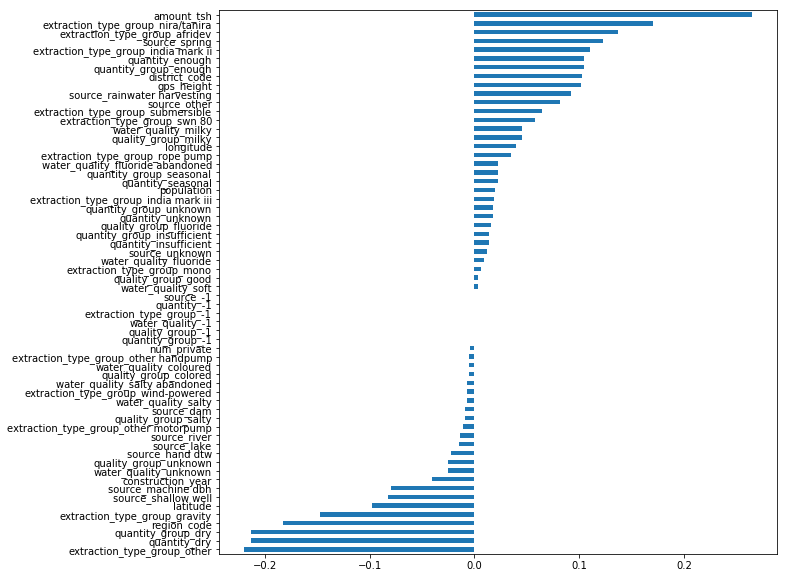

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
coefficients.sort_values().plot.barh();

In [65]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)

all(X_test_encoded.columns == X_train_encoded.columns)

/Users/mattmastin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


True

In [45]:
X_test_encoded.columns

Index(['quantity_enough', 'quantity_insufficient', 'quantity_dry',
       'quantity_unknown', 'quantity_seasonal', 'quantity_-1',
       'quantity_group_enough', 'quantity_group_insufficient',
       'quantity_group_dry', 'quantity_group_unknown',
       'quantity_group_seasonal', 'quantity_group_-1', 'quality_group_good',
       'quality_group_milky', 'quality_group_unknown', 'quality_group_salty',
       'quality_group_colored', 'quality_group_fluoride', 'quality_group_-1',
       'source_river', 'source_spring', 'source_shallow well',
       'source_rainwater harvesting', 'source_machine dbh', 'source_lake',
       'source_dam', 'source_hand dtw', 'source_other', 'source_unknown',
       'source_-1', 'water_quality_soft', 'water_quality_milky',
       'water_quality_unknown', 'water_quality_salty',
       'water_quality_coloured', 'water_quality_salty abandoned',
       'water_quality_fluoride', 'water_quality_fluoride abandoned',
       'water_quality_-1', 'extraction_type_group_su

In [66]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-02.csv', index=False)

In [67]:
!head submission-02.csv

id,status_group
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,non functional
28965,non functional
36301,non functional
